In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
import pmdarima as pm

In [2]:
df = pd.read_csv('SP500_Datos.csv')
#df = df.dropna()
df.ds = df.set_index('ds',inplace=True)
df.head()

,y
ds,
1979-04-11,102.31
1979-04-12,102.00
1979-04-16,101.12
1979-04-17,101.24
1979-04-18,101.70


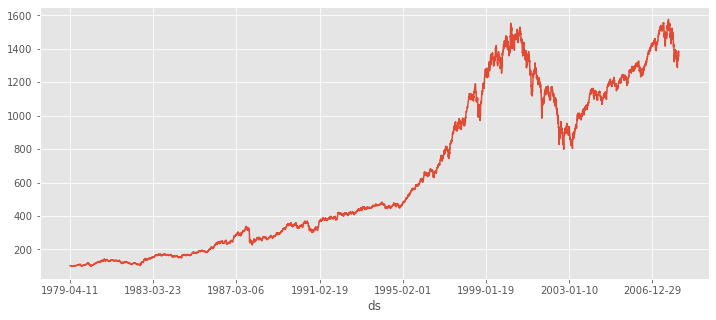

In [4]:
df['y'].plot(figsize=(12,5));

In [5]:
def adf_test(data):
    dftest = adfuller(data,autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num de rezagos : ", dftest[2])
    print("4. Número de observaciones utilizadas para la regresión ADF y el cálculo de valores críticos: ", dftest[3])
    print("5. Valores Criticos :")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [6]:
adf_test(df['y'].dropna())

1. ADF :  -0.1846718637522179
2. P-Value :  0.9403241977623458
3. Num de rezagos :  34
4. Número de observaciones utilizadas para la regresión ADF y el cálculo de valores críticos:  7287
5. Valores Criticos :
	 1% : -3.4312477089406035
	 5% : -2.8619367176874935
	 10% : -2.566981168585288
